## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path('./Resources/bitstamp.csv'), index_col='Timestamp', parse_dates=True, infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path('./Resources/coinbase.csv'), index_col='Timestamp', parse_dates=True, infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()

In [7]:
bitstamp['Open'].isnull().sum()

0

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].str.replace("$", "")

/tmp/ipykernel_4208/3207634487.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].str.replace("$", "")


In [9]:
# STUDENT ADDED CODE, verifying '$' is gone
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,6928.01,0.209363,1450.735763,6929.289993


### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].astype("float")

In [11]:
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [12]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()

In [14]:
coinbase.loc[:, 'Open'].isnull().sum()

0

In [15]:
# Step 2
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].str.replace("$", "")

/tmp/ipykernel_4208/1969668627.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].str.replace("$", "")


In [16]:
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,6934.0,1.012720,7022.275088,6934.070316


In [17]:
# Step 3
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].astype("float")

In [18]:
# Step 3 student added code
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [19]:
# Step 4, checking for duplicate rows
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [20]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.DataFrame(bitstamp.loc[:, 'Close'].copy())

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [21]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = pd.DataFrame(coinbase.loc[: ,'Close'].copy())

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [22]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [23]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

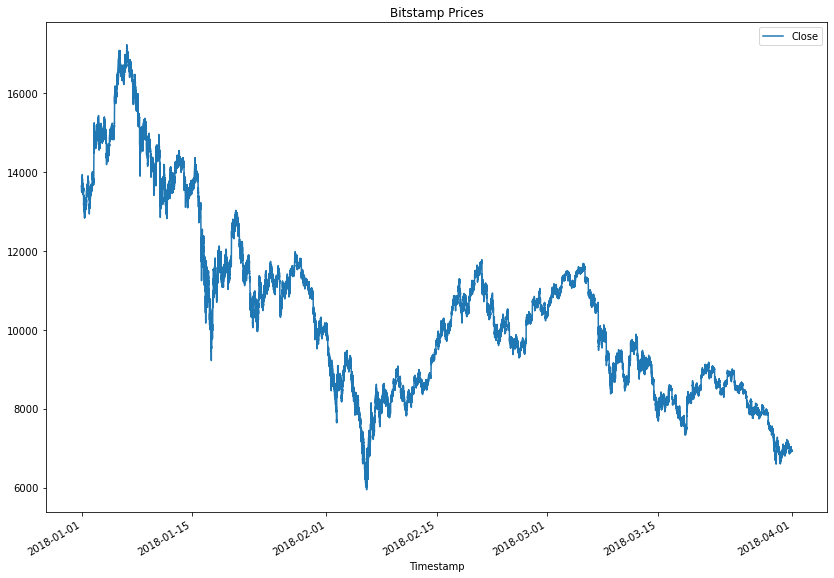

In [24]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(title='Bitstamp Prices', figsize=(14, 10), xlabel='Timestamp')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

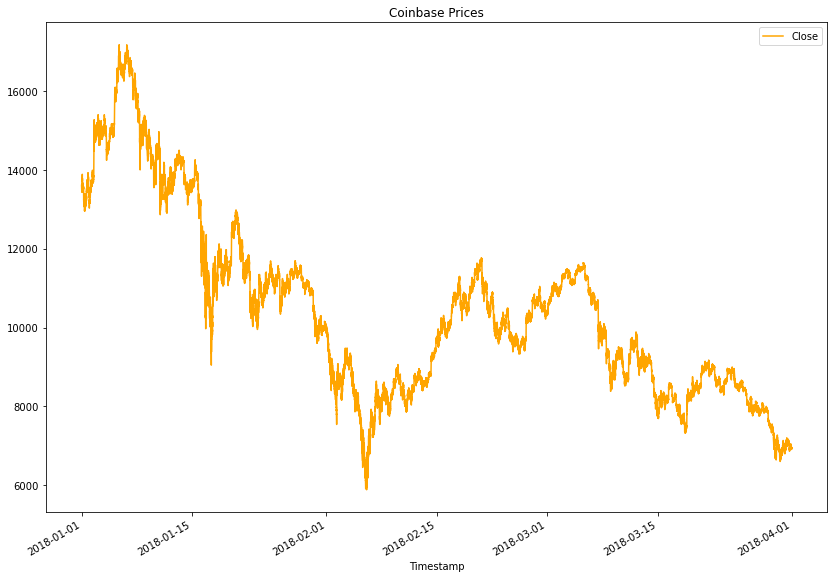

In [25]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(title='Coinbase Prices', figsize=(14,10), xlabel='Timestamp', color='Orange')

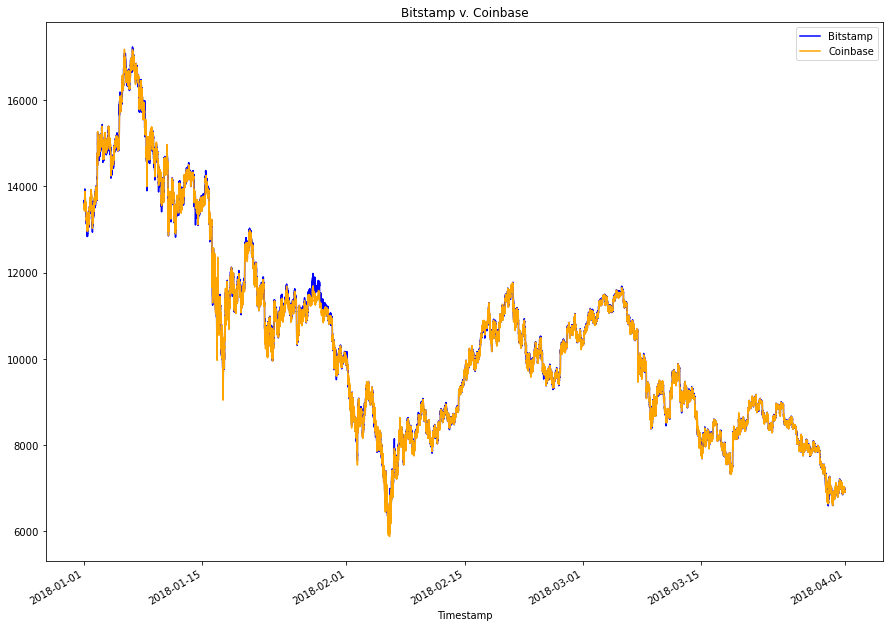

In [26]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax=bitstamp_sliced.plot(color='Blue')
coinbase_sliced.plot(title="Bitstamp v. Coinbase", figsize=(15,11), xlabel='Timestamp', ax=ax, legend=True, color='Orange').legend(['Bitstamp', 'Coinbase'])

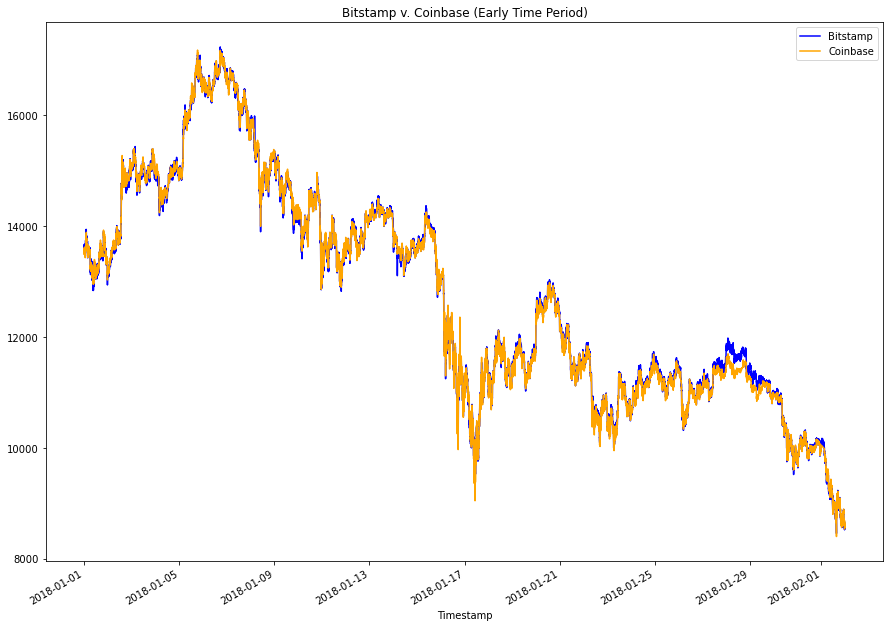

In [27]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax=bitstamp_sliced.loc[:'2018-02-01', :].plot(color='Blue')
coinbase_sliced.loc[:'2018-02-01', :].plot(title="Bitstamp v. Coinbase (Early Time Period)", figsize=(15,11), xlabel='Timestamp', ax=ax, legend=True, color='Orange').legend(['Bitstamp', 'Coinbase'])

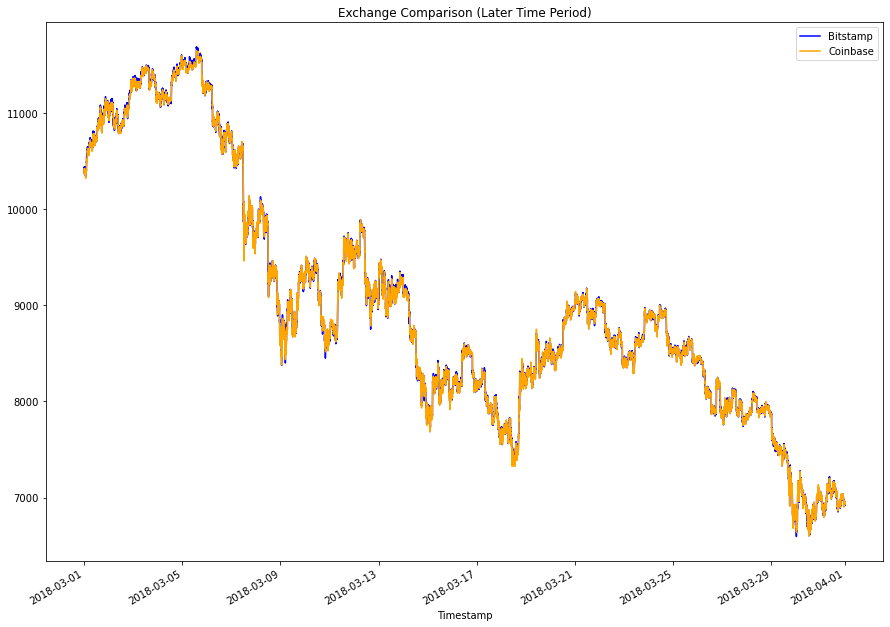

In [28]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax=bitstamp_sliced.loc['2018-03-01':, :].plot(color='Blue')
coinbase_sliced.loc['2018-03-01':, :].plot(title="Exchange Comparison (Later Time Period)", figsize=(15,11), xlabel='Timestamp', ax=ax, color='Orange').legend(['Bitstamp', 'Coinbase'])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

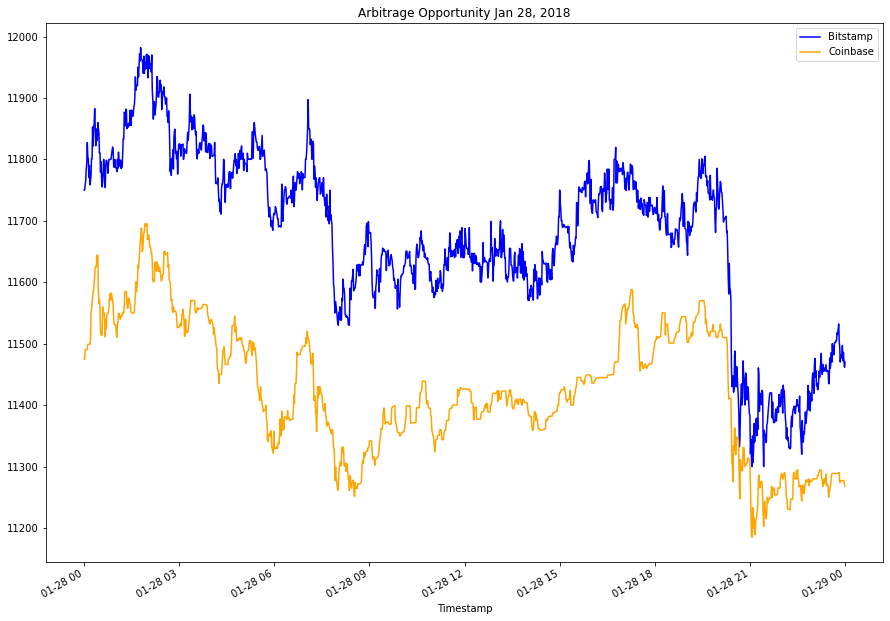

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax=bitstamp_sliced.loc['2018-01-28': '2018-01-29 00:00:00', :].plot(color='Blue')
coinbase_sliced.loc['2018-01-28': '2018-01-29 00:00:00', :].plot(title="Arbitrage Opportunity Jan 28, 2018", figsize=(15,11), xlabel='Timestamp', ax=ax, color='Orange').legend(['Bitstamp', 'Coinbase'])

In [30]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# STUDENT NOTE TO GRADER: I think it's the other way around, Coinbase closing lower than Bitstamp, either way
# there's an arbitrage opportunity :), I like monies
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-28': '2018-01-29 00:00:00', :] - coinbase_sliced.loc['2018-01-28': '2018-01-29 00:00:00', :]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1437.000000
mean,247.520612
std,68.330248
min,55.030000
25%,209.910000
50%,251.170000
75%,290.900000
max,439.010000


<AxesSubplot:title={'center':'Arbitrage Spread Early'}>

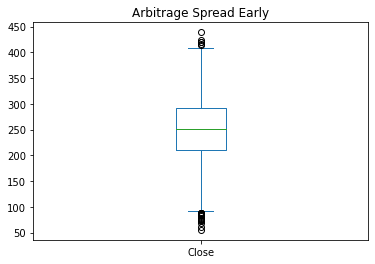

In [31]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title='Arbitrage Spread Early')

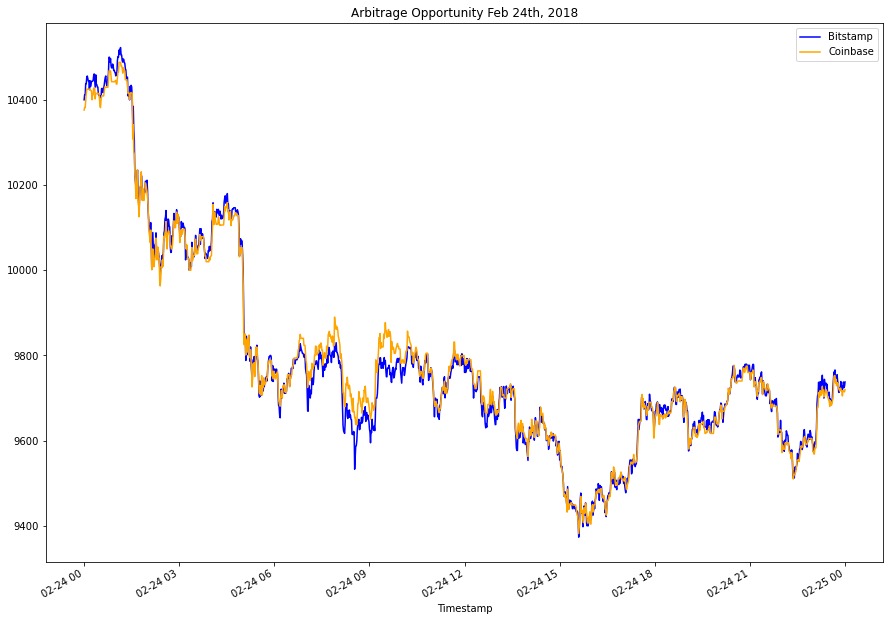

In [32]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax=bitstamp_sliced.loc['2018-02-24': '2018-02-25 00:00:00', :].plot(color='Blue')
coinbase_sliced.loc['2018-02-24': '2018-02-25 00:00:00', :].plot(title="Arbitrage Opportunity Feb 24th, 2018", figsize=(15,11), xlabel='Timestamp', ax=ax, color='Orange').legend(['Bitstamp', 'Coinbase'])

In [33]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-24': '2018-02-25 00:00:00', :] - bitstamp_sliced.loc['2018-02-24': '2018-02-25 00:00:00', :]

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1438.000000
mean,3.381405
std,22.968268
min,-50.180000
25%,-10.605000
50%,-0.015000
75%,12.120000
max,121.320000


<AxesSubplot:title={'center':'Arbitrage Spread - Feb 24th'}>

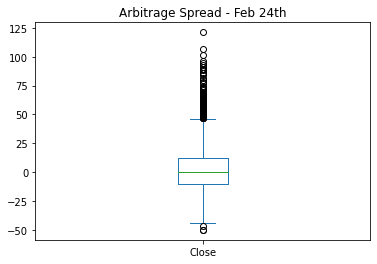

In [34]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', title='Arbitrage Spread - Feb 24th')

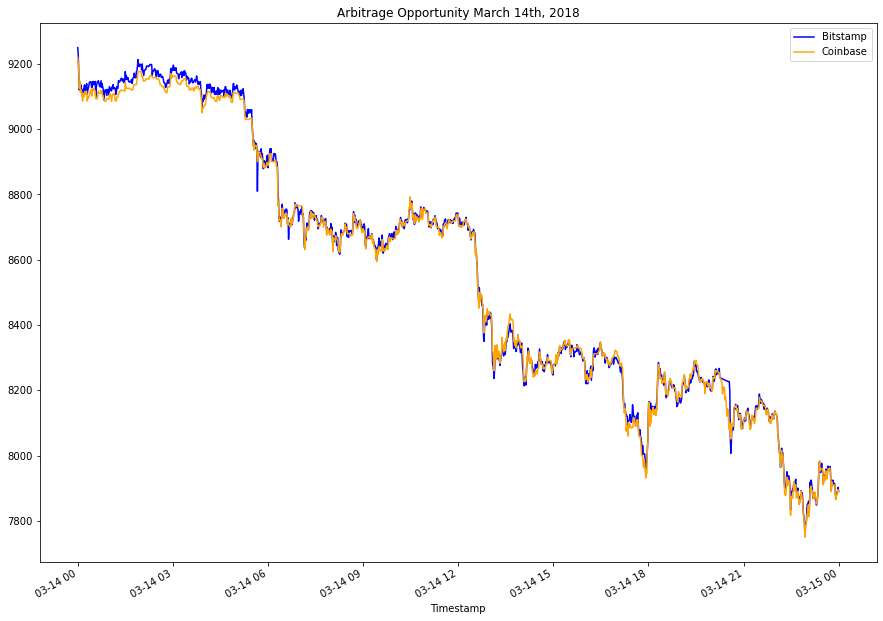

In [35]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax=bitstamp_sliced.loc['2018-03-14': '2018-03-15 00:00:00', :].plot(color='Blue')
coinbase_sliced.loc['2018-03-14': '2018-03-15 00:00:00', :].plot(title="Arbitrage Opportunity March 14th, 2018", figsize=(15,11), xlabel='Timestamp', ax=ax, color='Orange').legend(['Bitstamp', 'Coinbase'])

In [36]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-14': '2018-03-15 00:00:00', :] - coinbase_sliced.loc['2018-03-14': '2018-03-15 00:00:00', :]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1426.00000
mean,6.72737
std,16.31717
min,-90.01000
25%,-2.90500
50%,5.99000
75%,16.59000
max,147.65000


<AxesSubplot:title={'center':'Arbitrage Spread - March 15th'}>

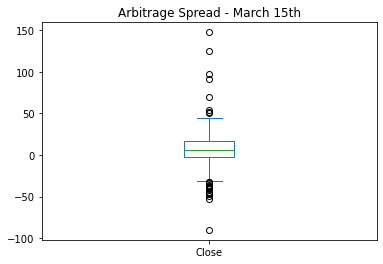

In [37]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title='Arbitrage Spread - March 15th')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [45]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
pos_arbitrage_spread_early_filter = (bitstamp_sliced.loc['2018-01-28': '2018-01-29 00:00:00', :] - coinbase_sliced.loc['2018-01-28': '2018-01-29 00:00:00', :]) > 0

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
pos_spread_early = arbitrage_spread_early[pos_arbitrage_spread_early_filter]
pos_spread_early.describe()

,Close
count,1437.000000
mean,247.520612
std,68.330248
min,55.030000
25%,209.910000
50%,251.170000
75%,290.900000
max,439.010000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [46]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = pos_spread_early / coinbase_sliced.loc['2018-01-28': '2018-01-29 00:00:00']

# Review the spread return DataFrame
spread_return_early.describe()

,Close
count,1437.000000
mean,0.021645
std,0.005959
min,0.004885
25%,0.018365
50%,0.021897
75%,0.025289
max,0.038510


In [51]:
pos_spread_mid = arbitrage_spread_middle > 0
spread_return_mid = arbitrage_spread_middle[pos_spread_mid] / coinbase_sliced.loc['2018-02-24': '2018-02-25 00:00:00']
spread_return_mid = spread_return_mid.dropna()
spread_return_mid.describe()

,Close
count,7.130000e+02
mean,2.038986e-03
std,2.116958e-03
min,9.999990e-07
25%,5.232847e-04
50%,1.278650e-03
75%,2.811594e-03
max,1.256640e-02


In [52]:
pos_spread_late = arbitrage_spread_late > 0
spread_return_late = arbitrage_spread_late[pos_spread_late] / coinbase_sliced.loc['2018-03-14': '2018-03-15 00:00:00']
spread_return_late = spread_return_late.dropna()
spread_return_late.describe()

,Close
count,957.000000
mean,0.001692
std,0.001446
min,0.000001
25%,0.000685
50%,0.001391
75%,0.002429
max,0.018276


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [57]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profit_early_filter = spread_return_early > .01
profitable_trades_early = spread_return_early[profit_early_filter]

profit_mid_filter = spread_return_mid > .01
profitable_trades_mid = spread_return_mid[profit_mid_filter]

profit_late_filter = spread_return_late > .01
profitable_trades_late = spread_return_late[profit_late_filter]

# Review the first five profitable trades
profitable_trades_early.head()

,Close
Timestamp,
2018-01-28 00:00:00,0.023999
2018-01-28 00:01:00,0.023965
2018-01-28 00:02:00,0.023392
2018-01-28 00:03:00,0.023936
2018-01-28 00:04:00,0.025610


In [58]:
profitable_trades_mid = profitable_trades_mid.dropna()
profitable_trades_mid.head()

,Close
Timestamp,
2018-02-24 08:32:00,0.012566
2018-02-24 09:32:00,0.010855
2018-02-24 09:39:00,0.010324


In [59]:
# STUDENT INPUT: These NaNs indicate
profitable_trades_late = profitable_trades_late.dropna()
profitable_trades_late.head()

,Close
Timestamp,
2018-03-14 20:31:00,0.011296
2018-03-14 20:32:00,0.015508
2018-03-14 20:33:00,0.018276
2018-03-14 20:34:00,0.012002


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [125]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# STUDENT INPUT: LOTS of profitable trades to be made here
profitable_trades_early.describe()

,Close
count,1379.000000
mean,0.022198
std,0.005420
min,0.010087
25%,0.019011
50%,0.022190
75%,0.025412
max,0.038510


In [60]:
profitable_trades_mid.describe()    # Not too many here

,Close
count,3.000000
mean,0.011248
std,0.001172
min,0.010324
25%,0.010589
50%,0.010855
75%,0.011711
max,0.012566


In [61]:
profitable_trades_late.describe()    # Not to many here

,Close
count,4.000000
mean,0.014271
std,0.003244
min,0.011296
25%,0.011826
50%,0.013755
75%,0.016200
max,0.018276


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [65]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = spread_return_early * coinbase_sliced.loc['2018-01-28': '2018-01-29 00:00:00']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

,Close
Timestamp,
2018-01-28 00:00:00,275.38
2018-01-28 00:01:00,275.00
2018-01-28 00:02:00,268.77
2018-01-28 00:03:00,275.03
2018-01-28 00:04:00,294.26
...,...
2018-01-28 23:56:00,195.11
2018-01-28 23:57:00,208.74
2018-01-28 23:58:00,195.12


In [62]:
profit_mid = spread_return_mid * coinbase_sliced.loc['2018-02-24': '2018-02-25 00:00:00', :]
profit_per_trade_mid = profit_mid.dropna()
profit_per_trade_mid

,Close
Timestamp,
2018-02-24 00:10:00,1.28
2018-02-24 00:27:00,1.97
2018-02-24 00:28:00,5.07
2018-02-24 01:23:00,5.97
2018-02-24 01:24:00,1.70
...,...
2018-02-24 23:20:00,2.45
2018-02-24 23:47:00,1.74
2018-02-24 23:48:00,8.22


In [63]:
profit_late = spread_return_late * coinbase_sliced.loc['2018-03-14': '2018-03-15 00:00:00']
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

,Close
Timestamp,
2018-03-14 00:00:00,30.00
2018-03-14 00:01:00,28.76
2018-03-14 00:05:00,17.84
2018-03-14 00:06:00,14.57
2018-03-14 00:07:00,3.00
...,...
2018-03-14 23:55:00,8.78
2018-03-14 23:56:00,7.04
2018-03-14 23:57:00,2.27


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [66]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

,Close
count,1437.000000
mean,247.520612
std,68.330248
min,55.030000
25%,209.910000
50%,251.170000
75%,290.900000
max,439.010000


<AxesSubplot:title={'center':'Profit per  Trade January 28th'}, xlabel='Timestamp'>

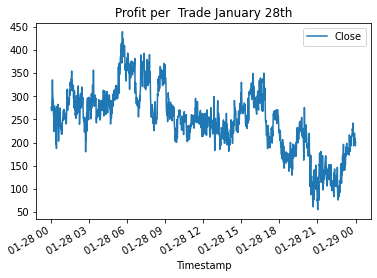

In [67]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title='Profit per  Trade January 28th', xlabel='Timestamp')

<AxesSubplot:title={'center':'Profit per Trade - February 24th'}, xlabel='Timestamp'>

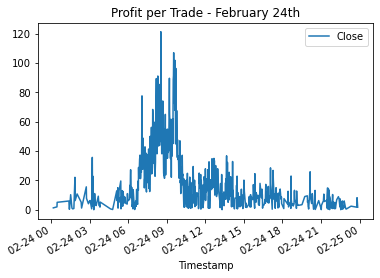

In [70]:
profit_per_trade_mid.describe()
profit_per_trade_mid.plot(title='Profit per Trade - February 24th', xlabel='Timestamp')

In [71]:
profit_per_trade_late.describe()

,Close
count,957.000000
mean,14.759707
std,12.424196
min,0.010000
25%,5.890000
50%,11.930000
75%,21.310000
max,147.650000


<AxesSubplot:title={'center':'Profit per Trade Match 15th'}, xlabel='Timestamp'>

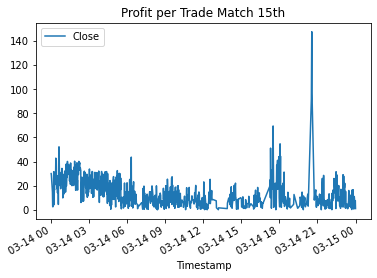

In [72]:
profit_per_trade_late.plot(title='Profit per Trade Match 15th', xlabel='Timestamp')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [145]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

Close    355687.12
dtype: float64

In [73]:
profit_per_trade_mid.sum()

Close    14174.69
dtype: float64

In [74]:
profit_per_trade_late.sum()

Close    14125.04
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [146]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

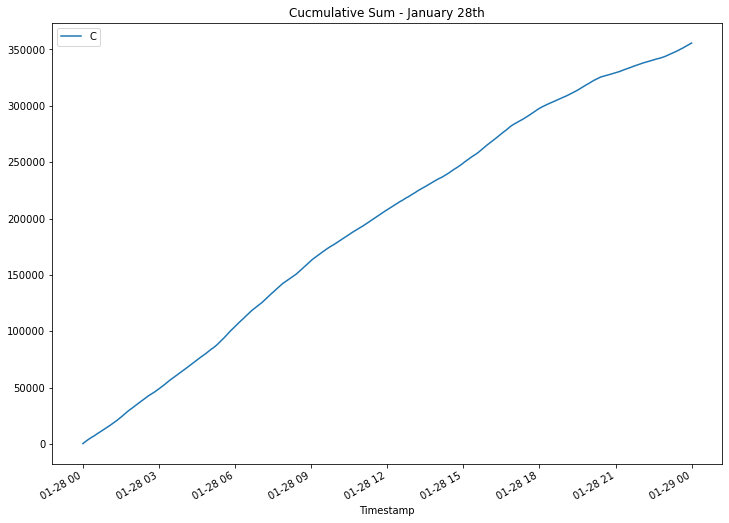

In [149]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title='Cucmulative Sum - January 28th', xlabel='Timestamp', figsize=(12,9)).legend('Cumulative Profit')

<AxesSubplot:title={'center':'Cumulative Profit over Feb 24th'}, xlabel='Timestamp'>

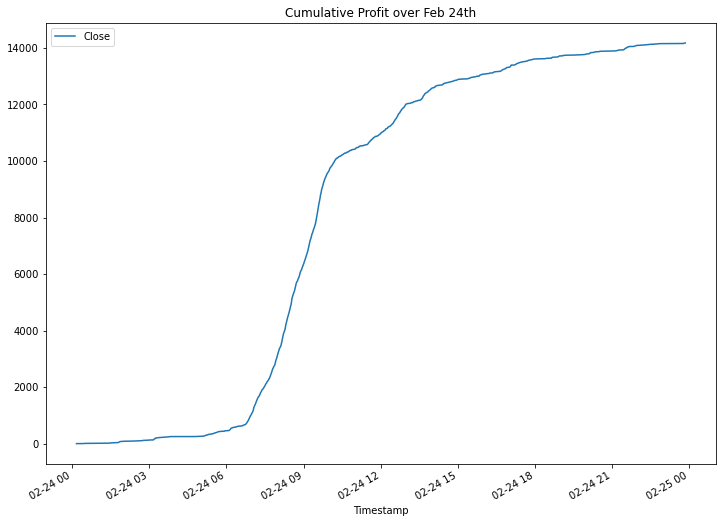

In [78]:
cumulative_profit_mid = profit_per_trade_mid.cumsum()
cumulative_profit_mid.plot(title='Cumulative Profit over Feb 24th', figsize=(12,9), xlabel='Timestamp')

<AxesSubplot:title={'center':'Cumulative Profit March 15th'}, xlabel='Timestamp'>

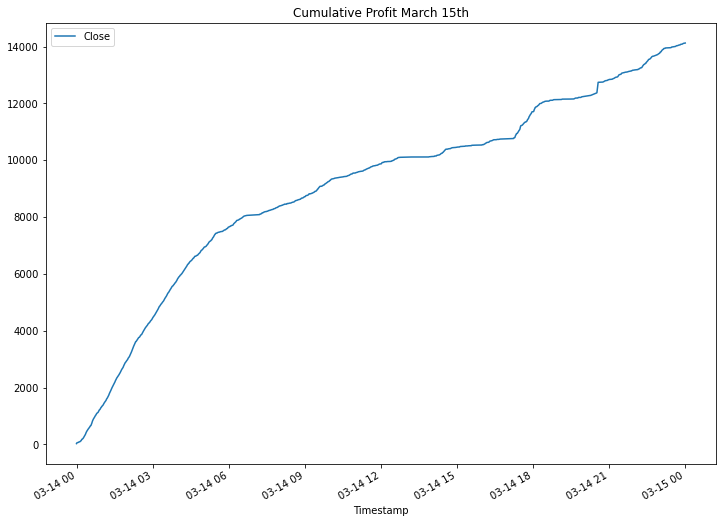

In [79]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.plot(title='Cumulative Profit March 15th', figsize=(12,9), xlabel='Timestamp') 

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** During the early time frames, there were several profitable opportunities. During the mid and later dates, there wasn't sufficient spread to be profitable. Granted, at specific points throughout the day, the profit margin exceeded the transaction cost of 1% but, not consistently. For example, the total profit from all possible trades in the early period amounted to `355687.12`. But, for the middle and later periods, the totals were considerable less at `14174.69` and `14125.04` respectively.

**STUDENT EXTRA ANALYSIS**
Here I'm visualizing a hypothetical scenario in which you took advantage of ALL profitable arbitrage trades. If one took advantage of ALL profitable trades, they would net `627783.59` in profit over the time period.

Total possible arbitrage profit over 4 months assuming sufficient money: 627783.5899999999


<AxesSubplot:xlabel='Timestamp'>

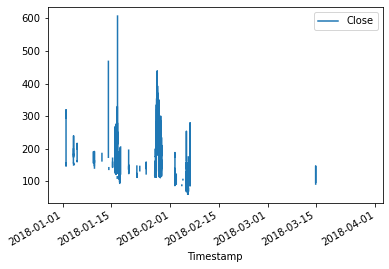

In [173]:
min_profit = .01
abs_df = (bitstamp_sliced - coinbase_sliced).abs()
# abs_df.plot()
spread_percentage_df = abs_df / coinbase_sliced
profit_filter = spread_percentage_df > min_profit
bitstamp_prices = bitstamp_sliced[profit_filter]
coinbase_prices = coinbase_sliced[profit_filter]
profit_df = (bitstamp_prices - coinbase_prices).abs()
print(f"Total possible arbitrage profit over 4 months assuming sufficient money: {profit_df.sum()['Close']}")
profit_df.plot()